# Financial Market Analysis: Prices, Volume, and Distributions
Objective: This notebook downloads, analyzes, and visualizes financial data for a selection of stocks and an ETF (SPY) using Python. The analysis covers time series trends and price distributions.## 

1. Importing Libraries
First, we import the necessary libraries for our analysis.

pandas: A powerful library for data manipulation and analysis, primarily used here for its DataFrame structures.
yfinance: A popular library to download historical market data from Yahoo! Finance.
plotly.graph_objects: Used for creating interactive, publication-quality graphs.
matplotlib.pyplot & seaborn: Standard libraries for static data visualization. Seaborn is built on top of Matplotlib and provides a high-level interface for drawing attractive statistical graphics.
datetime: A module to work with dates and times.

In [4]:
import pandas as pd

!pip install yfinance

import yfinance as yf
import plotly.graph_objects as go
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

## 2. Configuration: Defining Parameters
Here we set the global parameters for our analysis: the start and end dates, and the list of assets we want to analyze.

Tickers: These are unique symbols representing specific assets on a stock exchang        e.
AAPL: Apple I        nc.
NVDA: NVIDIA Corporat        ion.
META: Meta Platforms,         Inc.
SPY: SPDR S&P 500 ETF Trust, an exchange-traded fund that tracks the S&P 500 index, a benchmark for the overall U.S. stock market.

In [5]:
# Define the start and end dates for our data analysis
start_date = "2020-01-01"
end_date = "2024-12-31"

# List of stock tickers to analyze
tickers = ["AAPL", "NVDA", "META", "SPY"]

## 3. Data Fetching and Processing
We will create a function to download the data for each ticker and then combine it into a single, clean DataFrame.

Financial Data Explanatio        n:
Adjusted Close Price (Adj Close): This is the closing price of a stock adjusted to reflect the value of that stock after accounting for any corporate actions. These actions include stock splits and dividend distributions. The adjusted close price is often preferred for historical analysis as it gives a more accurate representation of the firm's equity value and investor returns over time. Our script prioritizes Adj Close but falls back to the standard Close price if it's not availab        le.
Volume: This represents the total number of shares that were traded during a given day. High trading volume often indicates high investor interest and can be a confirmation of a price trend. Sudden spikes in volume can signal significant news or events affecting the company.

In [7]:
def fetch_price_volume_data(ticker):
    """
    Downloads historical price and volume data for a given stock ticker.
    """
    # Download data from Yahoo! Finance
    data = yf.download(ticker, start=start_date, end=end_date)
    
    # Select available columns (prefer 'Adj Close' over 'Close')
    if 'Adj Close' in data.columns:
        data = data[['Adj Close', 'Volume']]
    elif 'Close' in data.columns:
        data = data[['Close', 'Volume']]
    else:
        raise KeyError(f"Neither 'Adj Close' nor 'Close' is available for {ticker}")
        
    # Remove rows with any missing values
    data = data.dropna()
    
    # Rename columns for clarity
    data.columns = [f"{ticker} Close Price", f"{ticker} Volume"]
    return data

# Download the data for each ticker in our list
list_of_dataframes = [fetch_price_volume_data(ticker) for ticker in tickers]

# Combine all individual DataFrames into a single DataFrame
# axis=1 combines them side-by-side, aligning by date (the index)
price_volume_df = pd.concat(list_of_dataframes, axis=1)

# Display the first few rows of the combined data
price_volume_df.head()

C:\Users\Samuel Cardona Ochoa\AppData\Local\Temp\ipykernel_9760\3482878400.py:6: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, start=start_date, end=end_date)
[*********************100%***********************]  1 of 1 completed
C:\Users\Samuel Cardona Ochoa\AppData\Local\Temp\ipykernel_9760\3482878400.py:6: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, start=start_date, end=end_date)
[*********************100%***********************]  1 of 1 completed
C:\Users\Samuel Cardona Ochoa\AppData\Local\Temp\ipykernel_9760\3482878400.py:6: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, start=start_date, end=end_date)
[*********************100%***********************]  1 of 1 completed
C:\Users\Samuel Cardona Ochoa\AppData\Local\Temp\ipykernel_9760\3482878400.py:6: FutureWarning: YF.download() has changed argument au

AAPL Close Price  AAPL Volume  NVDA Close Price  NVDA Volume  \
Date                                                                       
2020-01-02         72.620819    135480400          5.971745    237536000   
2020-01-03         71.914833    146322800          5.876163    205384000   
2020-01-06         72.487846    118387200          5.900806    262636000   
2020-01-07         72.146957    108872000          5.972244    314856000   
2020-01-08         73.307510    132079200          5.983447    277108000   

            META Close Price  META Volume  SPY Close Price  SPY Volume  
Date                                                                    
2020-01-02        208.635406     12077100       299.406494    59151200  
2020-01-03        207.531479     11188400       297.139252    77709700  
2020-01-06        211.440048     17058900       298.272858    55653900  
2020-01-07        211.897507     14912400       297.434174    40496400  
2020-01-08        214.045731     13475000       299.019440    68296000

## 4. Time Series Analysis: Price and Volume Trends
Time series analysis involves plotting data points in time order. It is essential for observing trends, patterns, seasonality, and volatility in financial marketsity.

## Chart 1: Stock Price Performance
This chart plots the adjusted closing prices of each asset over time. It allows for a direct comparison of their performance and helps identify long-term trends and periods of high volatility.

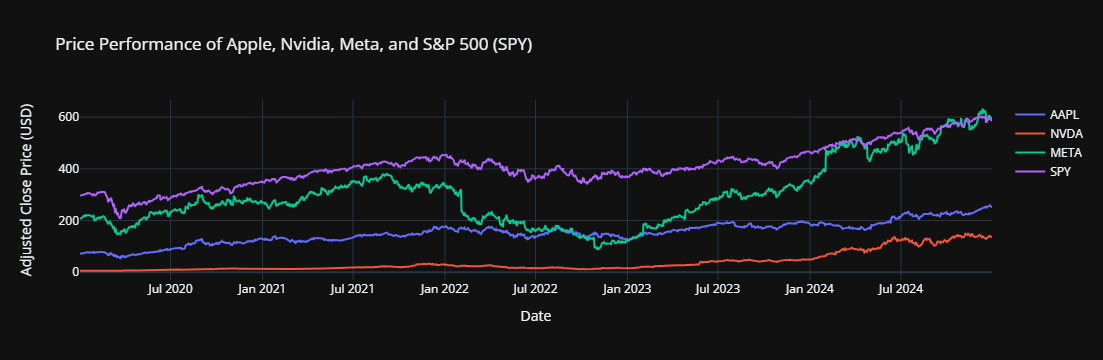

In [8]:
fig = go.Figure()

for ticker in tickers:
    fig.add_trace(go.Scatter(
        x=price_volume_df.index,
        y=price_volume_df[f"{ticker} Close Price"],
        mode='lines',
        name=ticker
    ))

fig.update_layout(
    title="Price Performance of Apple, Nvidia, Meta, and S&P 500 (SPY)",
    xaxis_title="Date",
    yaxis_title="Adjusted Close Price (USD)",
    template="plotly_dark"  # A dark theme for better visibility
)
fig.show()

## Chart 2: Trading Volume
This chart visualizes the trading volume for each asset. Observing volume alongside price can provide deeper insights. For example, a strong price increase accompanied by high volume is generally seen as more significant than one with low volume.

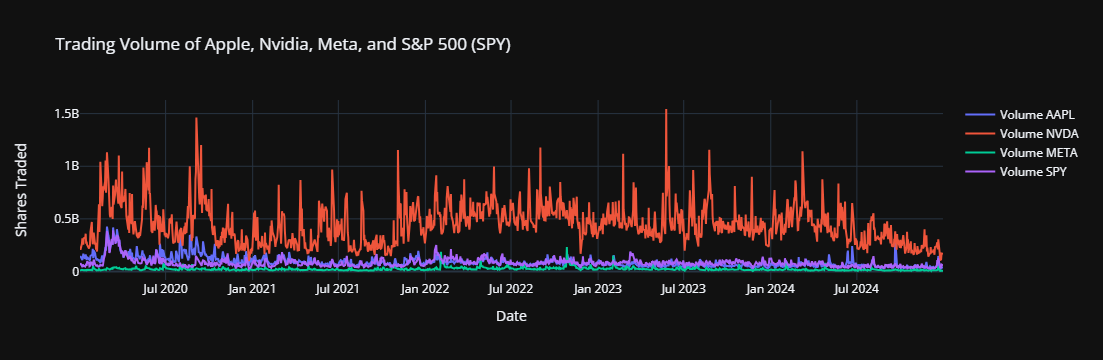

In [9]:
fig2 = go.Figure()

for ticker in tickers:
    fig2.add_trace(go.Scatter(
        x=price_volume_df.index,
        y=price_volume_df[f"{ticker} Volume"],
        mode='lines',
        name=f"Volume {ticker}"
    ))

fig2.update_layout(
    title="Trading Volume of Apple, Nvidia, Meta, and S&P 500 (SPY)",
    xaxis_title="Date",
    yaxis_title="Shares Traded",
    template="plotly_dark"
)
fig2.show()

## 5. Distribution Analysis: Price Histograms
While time series shows data over time, a distribution analysis looks at the frequency of data points within certain ranges. A histogram is a perfect tool for this.

In finance, we use histograms to understad        :

The most common price levels for a stock over a per        iod.
The range and dispersion of pr        ices.
The skewness of returns (whether the stock tends to have more small gains and a few large losses, or vice 
versa).
Here, we compare the distribution of Apple's stock price in 2020 versus 2024 to see how its valuation and trading behavior have evolved.

In [10]:
# Filter data for Apple in the year 2020 and 2024
aapl_2020_prices = price_volume_df.loc["2020-01-01":"2020-12-31", "AAPL Close Price"]
aapl_2024_prices = price_volume_df.loc["2024-01-01":end_date, "AAPL Close Price"]

## Chart 3: Price Distribution Histograms
The charts below show the frequency distribution of Apple's closing prices. The dashed line indicates the average (mean) price for the period, which is a measure of central tendency.

C:\Users\Samuel Cardona Ochoa\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

C:\Users\Samuel Cardona Ochoa\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



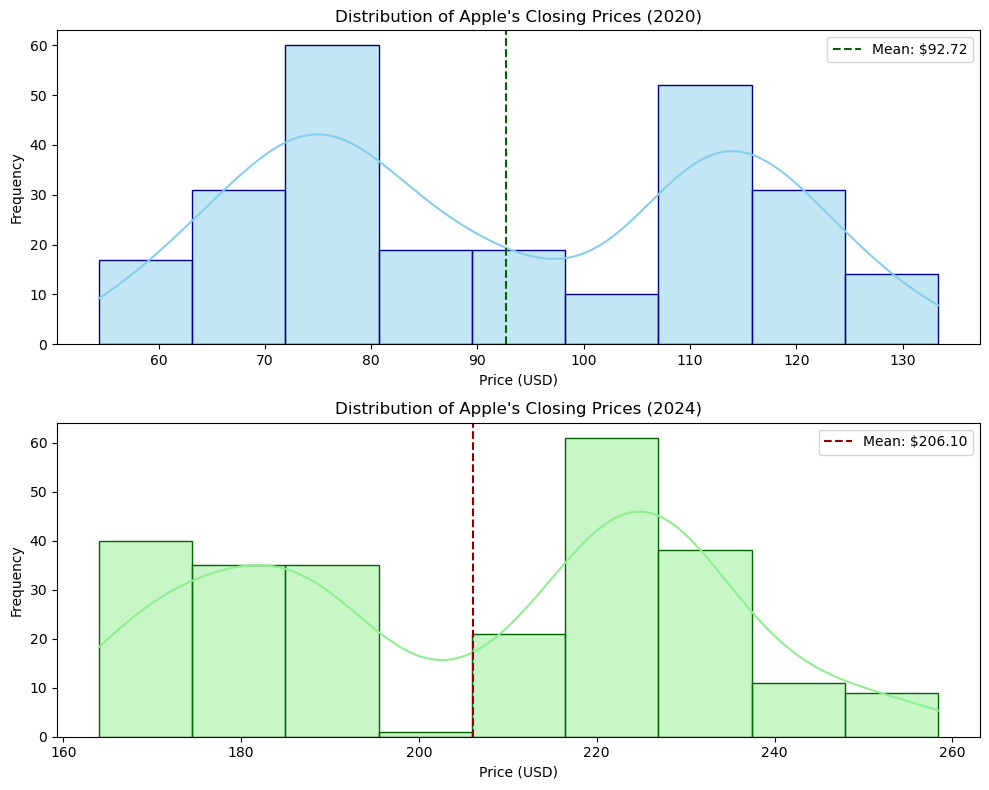

In [11]:
# Create a figure with two subplots, one for each year
fig, axes = plt.subplots(2, 1, figsize=(10, 8), sharex=False) # sharex=False as price ranges differ

# Plot for 2020
sns.histplot(aapl_2020_prices, kde=True, ax=axes[0], color="skyblue", edgecolor="darkblue")
axes[0].set_title("Distribution of Apple's Closing Prices (2020)")
axes[0].set_xlabel("Price (USD)")
axes[0].set_ylabel("Frequency")
axes[0].axvline(aapl_2020_prices.mean(), color="darkgreen", linestyle="--", label=f"Mean: ${aapl_2020_prices.mean():.2f}")
axes[0].legend()

# Plot for 2024
sns.histplot(aapl_2024_prices, kde=True, ax=axes[1], color="lightgreen", edgecolor="darkgreen")
axes[1].set_title("Distribution of Apple's Closing Prices (2024)")
axes[1].set_xlabel("Price (USD)")
axes[1].set_ylabel("Frequency")
axes[1].axvline(aapl_2024_prices.mean(), color="darkred", linestyle="--", label=f"Mean: ${aapl_2024_prices.mean():.2f}")
axes[1].legend()

# Adjust layout and display the plot
plt.tight_layout()
plt.show()